In [1]:
#imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats




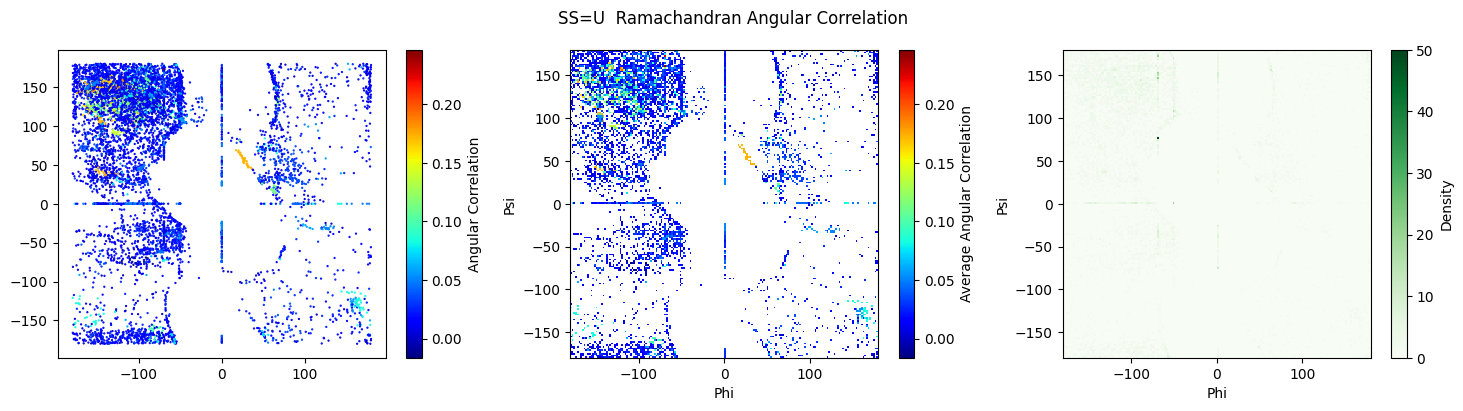

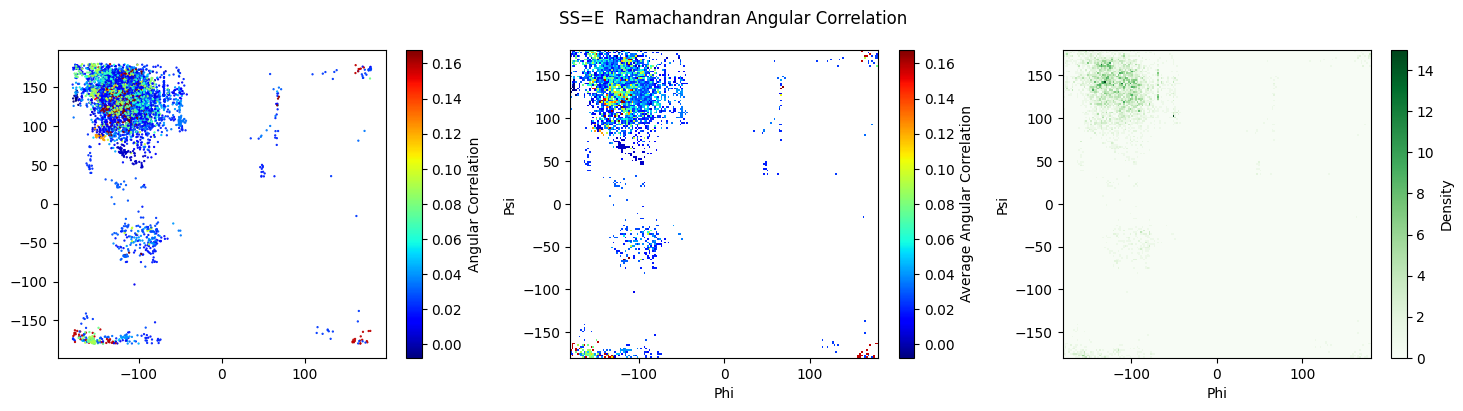

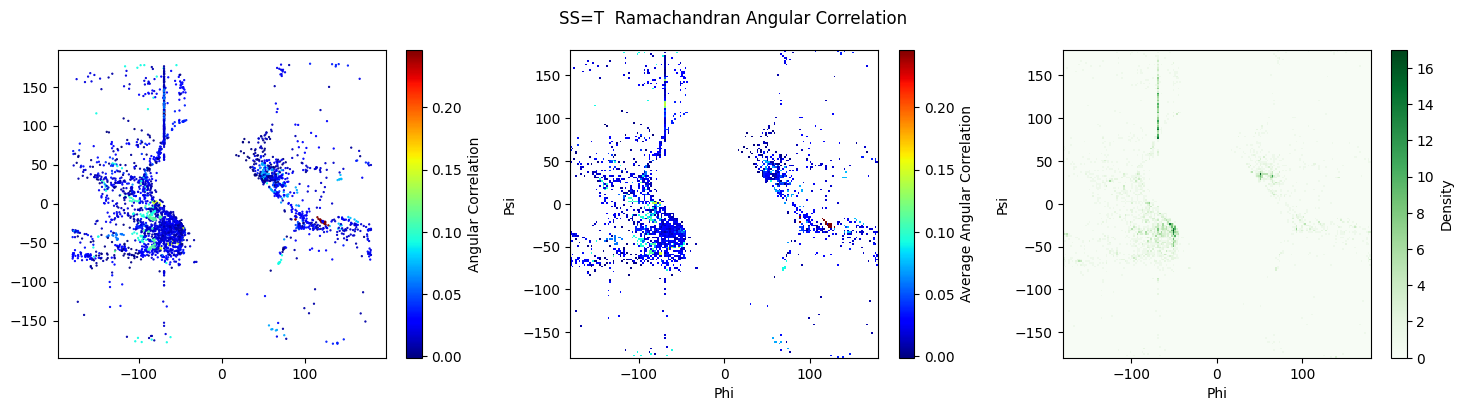

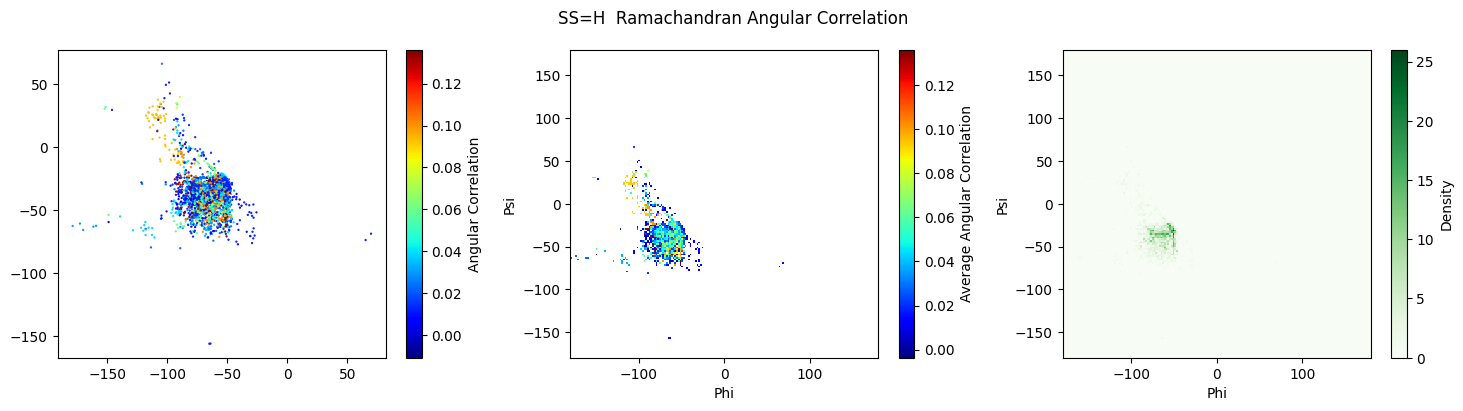

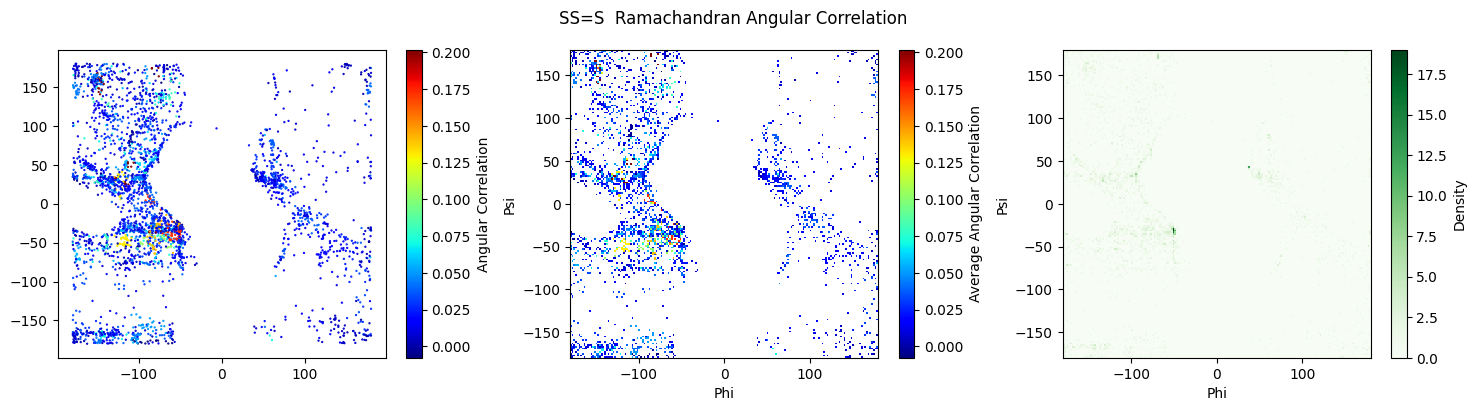

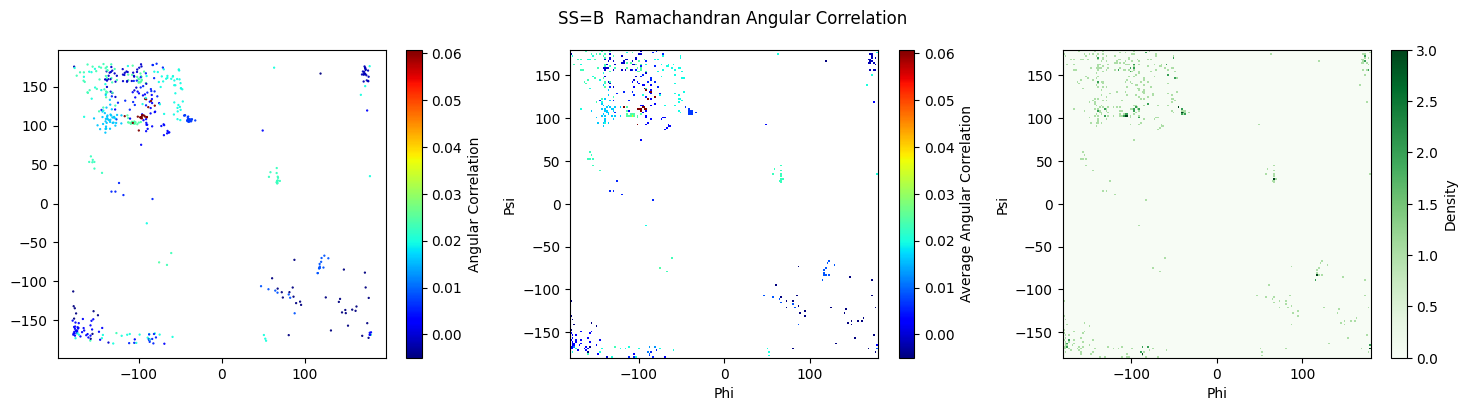

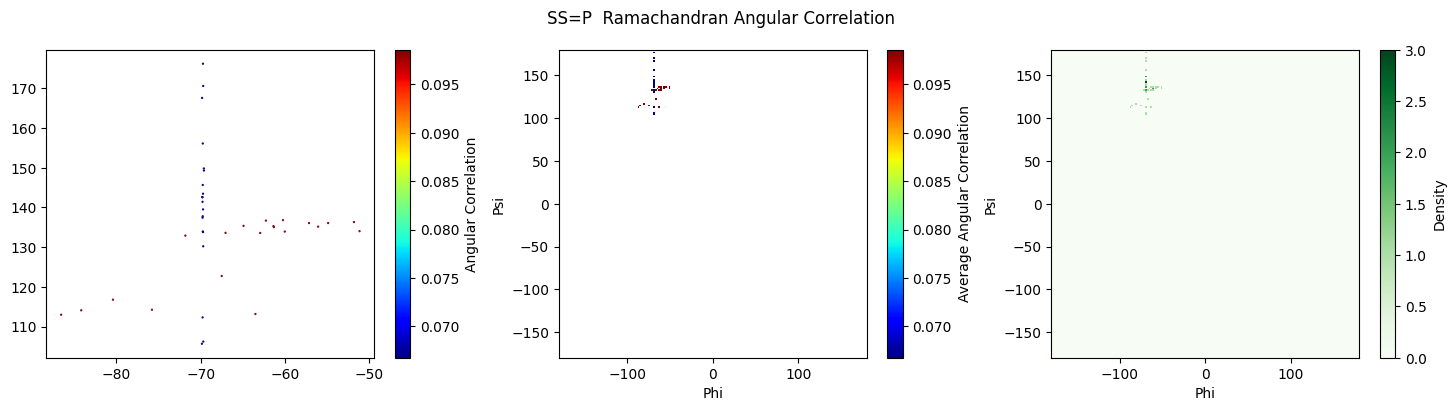

In [78]:
#make a for loop to loop over all secondary structures
#these are saved in the masterlist as
#load the master list

dssp = pd.read_csv('/usr/users/olivia/data/PDB/DATA_Olivia/DataSummary/masterList.csv')['ss'].unique()
for ss in dssp:
    data = pd.read_csv(f'/usr/users/olivia/data/PDB/DATA_Olivia/DataSummary/{ss}_overview.csv')
    #data = pd.read_csv('C:/Users/Olivia/Nextcloud/PhD/correlatedStructures/DATA_Olivia/DataSummary/H_overview.csv')
    phi= data.loc[:,'phi']
    psi= data.loc[:,'psi']
    ang_cor = data.loc[:,'ang_cor']
    dist_cor =data.loc[:,'dist_cor']


    #arrray with the min and max edge as well as the number of bins for the x and y axis
    x_bins = np.array([-180, 180, 180])
    y_bins = np.array([-180, 180, 180])

    #first histogram with angular correlation
    ret0= stats.binned_statistic_2d(phi, psi, ang_cor, statistic= 'mean', bins=[x_bins[2], y_bins[2]], range=[[x_bins[0], x_bins[1]], [y_bins[0], y_bins[1]]])
    #mask where there is no data

    #second histogram with density
    ret1= stats.binned_statistic_2d(phi, psi, ang_cor, statistic= 'count' , bins=[x_bins[2], y_bins[2]], range=[[x_bins[0], x_bins[1]], [y_bins[0], y_bins[1]]])

    #mask the arrays so that NaN are plotted white
    mret0 =np.ma.array(ret0.statistic.T, mask=np.isnan(ret0.statistic.T))
    mret1 =np.ma.array(ret1.statistic.T, mask=np.isnan(ret1.statistic.T))

    cmap0= plt.cm.get_cmap('jet').copy()
    cmap0.set_bad(color='w')

    cmap1=plt.cm.get_cmap('Greens').copy()
    cmap1.set_bad(color='white')


    #plotting the 3 subplots
    plt.subplots(1, 3, figsize=(18, 4))
    plt.suptitle(f'SS={ss}  Ramachandran Angular Correlation' )
    #fist subplot is the scatter plot
    plt.subplot(1,3, 1)
    # the color of the markers is the angular correlation with the colormap jet, the marker size 's'
    plt.scatter(phi, psi, c=ang_cor, cmap='jet', s=0.4  )
    plt.colorbar(label='Angular Correlation')
    #second subplot is the 2dhist with the ang_cor
    plt.subplot(1, 3, 2)
    plt.imshow(mret0, origin='lower', extent=(x_bins[0], x_bins[1],y_bins[0], y_bins[1]), cmap=cmap0, interpolation='none')
    plt.xlabel("Phi")
    plt.ylabel("Psi")
    plt.colorbar(label='Average Angular Correlation')



    # the third subplot with the density
    plt.subplot(1, 3 ,3)
    plt.imshow(mret1, origin='lower', extent=(x_bins[0], x_bins[1],y_bins[0], y_bins[1]), cmap=cmap1, interpolation='none')
    plt.xlabel("Phi")
    plt.ylabel("Psi")
    plt.colorbar(label='Density')
    plt.savefig(f'/usr/users/olivia/data/PDB/DATA_Olivia/Figures/{ss}_Ramachandran.eps')


In [79]:
from sklearn import mixture
print(help(mixture))


Help on package sklearn.mixture in sklearn:

NAME
    sklearn.mixture - The :mod:`sklearn.mixture` module implements mixture modeling algorithms.

PACKAGE CONTENTS
    _base
    _bayesian_mixture
    _gaussian_mixture
    tests (package)

CLASSES
    sklearn.mixture._base.BaseMixture(sklearn.base.DensityMixin, sklearn.base.BaseEstimator)
        sklearn.mixture._bayesian_mixture.BayesianGaussianMixture
        sklearn.mixture._gaussian_mixture.GaussianMixture
    
    class BayesianGaussianMixture(sklearn.mixture._base.BaseMixture)
     |  BayesianGaussianMixture(*, n_components=1, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weight_concentration_prior_type='dirichlet_process', weight_concentration_prior=None, mean_precision_prior=None, mean_prior=None, degrees_of_freedom_prior=None, covariance_prior=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
     |  
     |  Variational Bayesian estimation of a Gaussi